# Product EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import humanize

In [3]:
products = pd.read_csv('../data/clean_data/products_clean.csv', compression='zip', parse_dates=True, index_col='date')
products.head()

,territory,ar_div,customer_num,sold_to_name,item_num,item_description,item_type,unit_of_measure,weight,standard_price,quantity,price,year,month
date,,,,,,,,,,,,,,
2017-01-01,EB,0,1000026,Monterey Foods Market,039675777771,Have'a Corn Chips,CHIPS,EACH,4 oz,1.90,48.0,76.80,2017,1
2017-01-01,SF,0,1007292,Madera Liquor,039675777771,Have'a Corn Chips,CHIPS,EACH,4 oz,1.90,12.0,19.20,2017,1
2017-01-01,MR,0,1000282,Mollie Stone #1-Sausalito,704108725215,Casa Linda Enchilada Sauce,SAUCE,EACH,24 oz,3.51,12.0,42.12,2017,1
2017-01-01,SF,0,1007262,KD's Grog & Grocery,070415101562,Benzels Pennystick Rods,CHIPS,EACH,12 oz,1.81,6.0,10.86,2017,1
2017-01-01,SF,0,1007262,KD's Grog & Grocery,039675777771,Have'a Corn Chips,CHIPS,EACH,4 oz,1.90,6.0,9.60,2017,1


# Item Types

In [4]:
products['item_type'].value_counts()

CHIPS         49986
CANDY         41758
COOKIE        23226
SPICE         19566
SNACK         19342
SAUCE         13541
CRACKER       13385
OIL            7791
BARS           6179
BREAD          5275
HOT SAUCE      4956
NUTS           4909
TEA            4705
CONDIMENT      4506
PASTA          4400
CEREAL         3963
COFFEE         3632
BBQ SAUCE      3363
MARINADE       3307
COFFEE FIL     3066
MUSTARD        2708
HOUSEHOLD      2688
PICKLED        2413
COCO MILK      2362
MISC           2316
SALAD DRSG     2303
SYRUP          2103
VINEGAR        2008
EXTRACTS       1736
OLIVES         1704
BEVERAGE       1694
BEANS          1144
SPICE MIX       887
JAM             883
PET             757
VEGE            751
SEAFOOD         535
MIXERS          494
GRAIN           465
ASIAN NDLE      441
HONEY           282
MASKS           267
BRITISH         246
WINE            185
SALT            134
UMBRELLA        115
SALSA            59
OLIVE OIL        49
RAIN GEAR        30
FRUIT            26


In [5]:
products['item_type'].nunique()

52

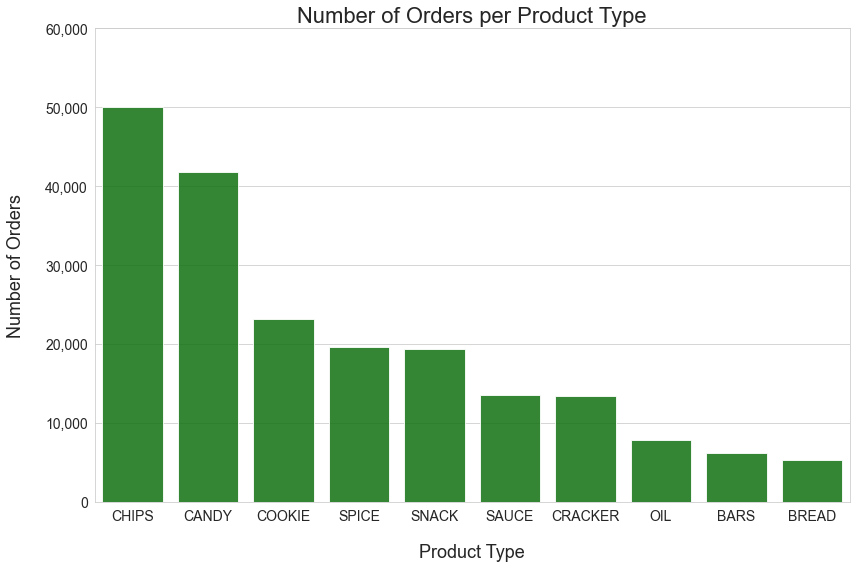

In [17]:
top_types = products['item_type'].value_counts().head(10)

plt.figure(figsize=(12,8))
sns.set_style('whitegrid')

sns.barplot(
    x=top_types.index, 
    y=top_types,
    color='green',
    alpha=.85,
)

locs, labels = plt.yticks()
ylabels = [humanize.intcomma(int(label)) for label in plt.yticks()[0]]

plt.xticks(fontsize=14)
plt.yticks(fontsize=14, ticks=locs, labels=ylabels)

plt.title('Number of Orders per Product Type', fontsize=22)
plt.xlabel('Product Type', fontsize=18, labelpad=20)
plt.ylabel('Number of Orders', fontsize=18, labelpad=20)

# sns.despine()
plt.tight_layout()

plt.savefig('../images/product_types.png');

Chips and Candy are the main product types being distributed.

# Item Descriptions

In [7]:
products['item_description'].value_counts()

Baker's Delight Crumpets          4250
La Morenita Original              4181
La Morenita Salt & Lime           4001
Have'a Corn Chips                 3054
Casa Linda Enchilada Sauce        2096
                                  ... 
Jelly Belly Toy Story 4              1
Ecos Free/Clear Handsoap-12.5        1
Roland Balsamic Vinegar              1
Sonoma Harv Sour Cherry Honey        1
Lindt Mlk Chc Hazelnut Truffle       1
Name: item_description, Length: 1872, dtype: int64

In [8]:
products['item_description'].nunique()

1872

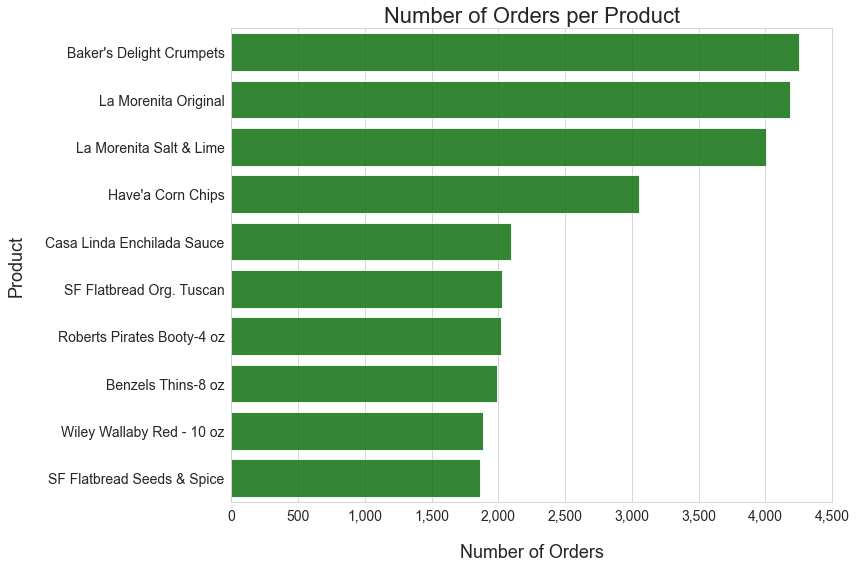

In [18]:
top_items = products['item_description'].value_counts().head(10)

plt.figure(figsize=(12,8))
sns.set_style('whitegrid')

sns.barplot(
    x=top_items,
    y=top_items.index, 
    orient='h',
    color='green',
    alpha=.85
)

locs, labels = plt.xticks()
xlabels = [humanize.intcomma(int(label)) for label in plt.xticks()[0]]

plt.xticks(fontsize=14, ticks=locs, labels=xlabels)
plt.yticks(fontsize=14)

plt.title('Number of Orders per Product', fontsize=22)
plt.xlabel('Number of Orders', fontsize=18, labelpad=20)
plt.ylabel('Product', fontsize=18, labelpad=20)


# sns.despine()
plt.tight_layout()

plt.savefig('../images/products.png');

6 out of these top 10 products are products the DCD controls the label. These should be looked at for more distribution.

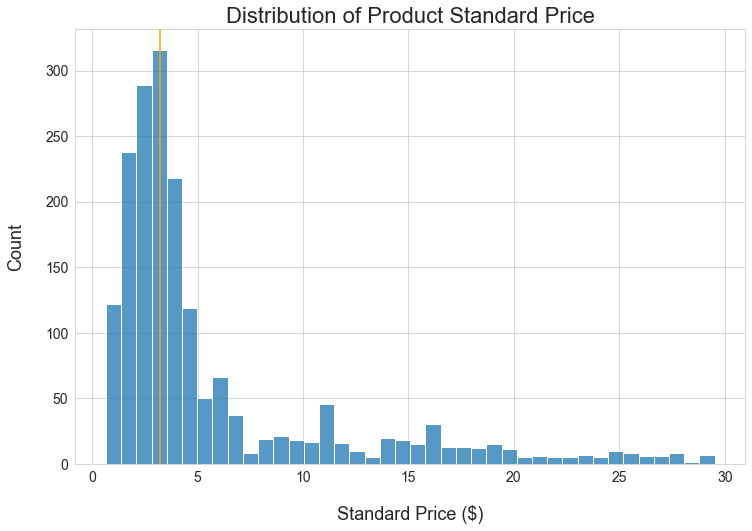

In [19]:
standard_price_gby = products.groupby(by='item_description')[['standard_price']].mean()
sp_hist = standard_price_gby[standard_price_gby['standard_price'] < 30].squeeze()

plt.figure(figsize=(12,8))

sns.histplot(
    sp_hist, 
    bins=40
)
plt.axvline(x=products['standard_price'].median(), color='orange')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Distribution of Product Standard Price', fontsize=22)
plt.xlabel('Standard Price ($)', fontsize=18, labelpad=20)
plt.ylabel('Count', fontsize=18, labelpad=20)

plt.savefig('../images/standard_price_dist.png');

The majority of products sell for less than $5, with the mean price being $3.40

In [11]:
sp_hist.median()

3.404142857142857

In [12]:
products['standard_price'].max()

392.57

In [13]:
territory_gby = products.groupby(by=[products.index, 'territory']).sum().reset_index()
territory_gby.head()

,date,territory,ar_div,customer_num,standard_price,quantity,price,year,month
0,2017-01-01,EB,0,447215272,2241.52,5862.0,23552.44,901599,447
1,2017-01-01,MN,0,221072272,1191.15,2167.0,5712.40,445757,221
2,2017-01-01,MR,0,1028073875,3798.32,16654.0,50735.31,2071459,1027
3,2017-01-01,NP,0,279144593,3093.71,2420.0,10365.20,562743,279
4,2017-01-01,PN,0,623403090,4151.95,6076.0,22208.31,1256591,623
